Import Necessary Libraries

In [2]:
import pandas as pd
import os
import glob

Import multiple csv files into pandas and concatenate into one DataFrame

In [3]:
path = r"./Sales_Data" 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

all_data = pd.concat(li, axis=0, ignore_index=True)

In [4]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Splitting Order Date Column into Individual Columns (Month,Day,Year)

In [5]:
all_data['Month'] = all_data['Order Date'].str[:2]
#all_data['Month'] = all_data['Month'].astype('int')

Filtering NaN

In [6]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
columns = all_data.columns
columns = list(columns)
for column in columns:
    all_data = all_data[all_data[column].notna()]

all_data.head()

#all_data = all_data.dropna(how = 'all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


Deleting Any 'Or' Occurencies

In [8]:
all_data = all_data[all_data['Month'] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [9]:
all_data['Month'] = all_data['Month'].astype('int32')

1. What was the best month for sales? How much was earned that month? 

In [10]:
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']	
all_data.head()

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [11]:
results = all_data.groupby('Month').sum()

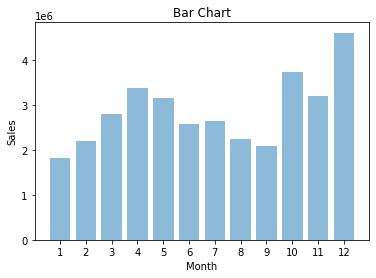

In [39]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results['Sales'], align='center', alpha=0.5)
plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.title('Bar Chart')

plt.show()

2. What city has the highest number of sales?

In [40]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


Add a City Column

In [41]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [47]:
results2 = all_data.groupby('City').sum()
results2

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


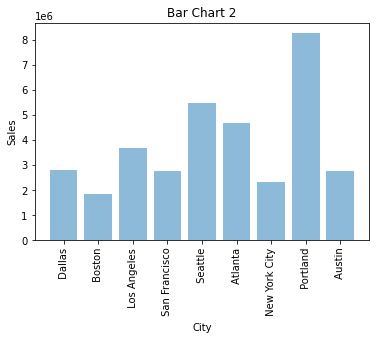

In [46]:
cities = all_data['City'].unique()
plt.bar(cities, results2['Sales'], align='center', alpha=0.5)
plt.xticks(cities,rotation = 'vertical')
plt.ylabel('Sales')
plt.xlabel('City')
plt.title('Bar Chart 2')

plt.show()

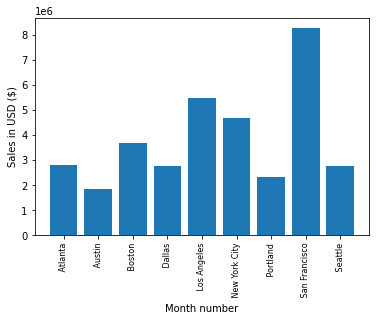

In [48]:
keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

3. What time should we display advertisements to maximize likelihood of customer's bying product?

In [49]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [63]:
all_data['Time'] = all_data['Order Date'].apply(lambda x: x.split(' ')[1])
all_data['Hour'] = all_data['Time'].apply(lambda x: x.split(':')[0])
all_data['Hour'] = all_data['Hour'].astype('int32')
all_data['Count'] = 1

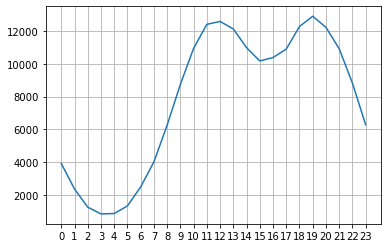

In [64]:
keys = [i for i, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()


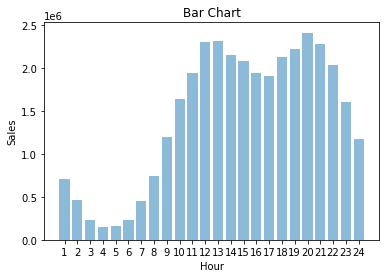

In [67]:
#Alternatively
results = all_data.groupby('Hour').sum()
hours = range(1,25)
plt.bar(hours, results['Sales'], align='center', alpha=0.5)
plt.xticks(hours)
plt.ylabel('Sales')
plt.xlabel('Hour')
plt.title('Bar Chart')

plt.show()

4. What products are most often sold together?

In [68]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Time,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,08:46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,22:30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,14:38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,14:38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,09:27,1


In [75]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Time,Count
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,14:38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,14:38,1
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,19:42,1
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,19:42,1
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,11:31,1
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20,20:18,1
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,00:25,1
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0,00:25,1
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13,13:49,1


In [89]:

df['Set of Items'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) #.apply() does not work here!
df

<ipython-input-89-48f5482ef925>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Set of Items'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Time,Count,Paired Items,Set of Items
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,14:38,1,"Google Phone,Wired Headphones","Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,14:38,1,"Google Phone,Wired Headphones","Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,19:42,1,"Google Phone,USB-C Charging Cable","Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,19:42,1,"Google Phone,USB-C Charging Cable","Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,11:31,1,"Bose SoundSport Headphones,Bose SoundSport Headphones","Bose SoundSport Headphones,Bose SoundSport Headphones"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20,20:18,1,"34in Ultrawide Monitor,AA Batteries (4-pack)","34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,00:25,1,"Wired Headphones,AAA Batteries (4-pack)","Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0,00:25,1,"Wired Headphones,AAA Batteries (4-pack)","Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13,13:49,1,"Google Phone,USB-C Charging Cable","Google Phone,USB-C Charging Cable"


In [92]:
df2 = df[['Order ID', 'Set of Items']].drop_duplicates()
df2.head()

,Order ID,Set of Items
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Headphones"
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
